In [5]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ds = load_boston()

In [3]:
print(ds['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
df = pd.DataFrame(ds.data,columns=ds.feature_names)

In [10]:
df['MEDV'] = ds.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
import seaborn as sns

/Users/fanwenyu/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


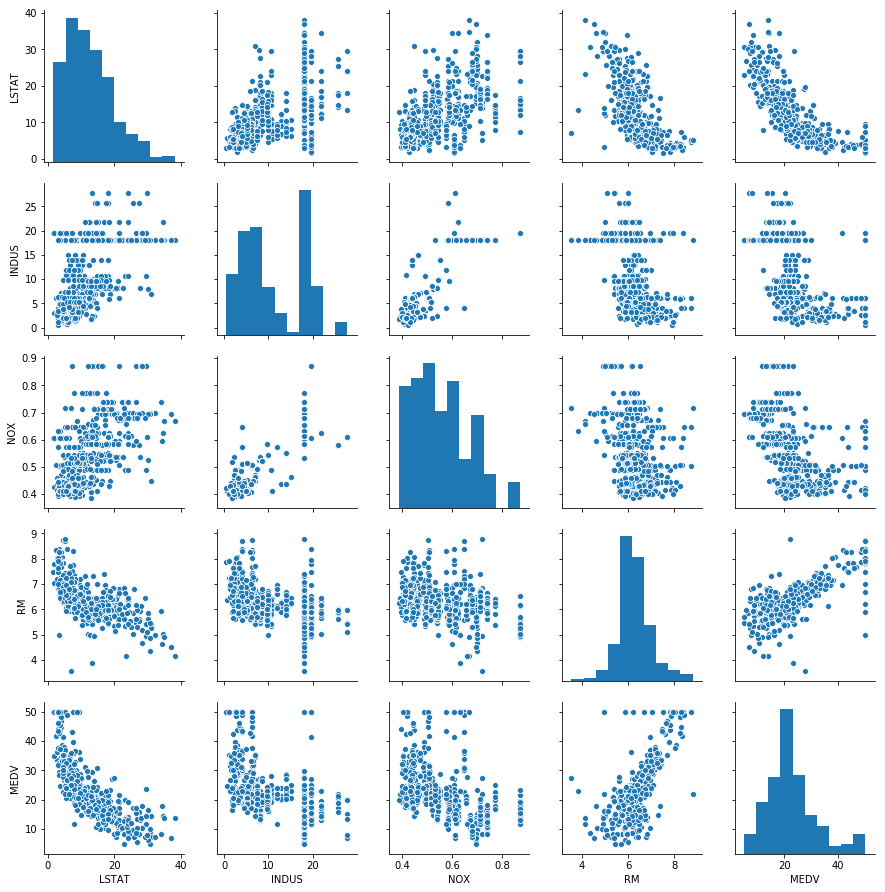

In [13]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols],size=2.5)
plt.tight_layout
plt.show()

In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


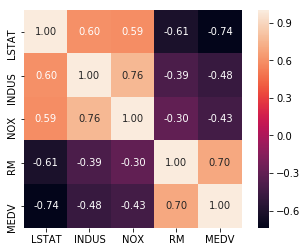

In [17]:
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,cbar = True, annot=True,square=True,fmt='.2f',xticklabels = cols,yticklabels=cols)

In [21]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [30]:
y.shape

(506,)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [29]:
slr = LinearRegression()
slr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

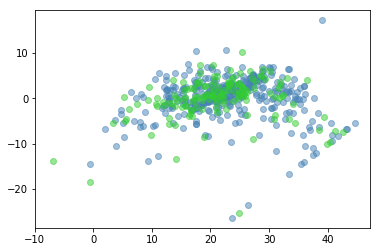

In [36]:
plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',alpha = 0.5,marker='o')
plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',alpha = 0.5,marker='o')

In [39]:
from sklearn.linear_model import Lasso,ElasticNet,Ridge

In [40]:
en = ElasticNet(alpha=1.0,l1_ratio=0.5)
rr = Ridge(alpha=1.0)
lasr = Lasso(alpha=1.0)

In [53]:
ElasticNet?

In [41]:
rr.fit(X_train,y_train)
y_train_pred = rr.predict(X_train)
y_test_pred = rr.predict(X_test)

In [42]:
rr.coef_

array([-0.12753673,  0.03692054,  0.01822402,  2.93419489, -7.87285718,
        4.05573872, -0.01720046, -1.27221039,  0.22495578, -0.00937229,
       -0.82798775,  0.01213259, -0.56446838])

In [43]:
slr.coef_

array([-1.32774155e-01,  3.57812335e-02,  4.99454423e-02,  3.12127706e+00,
       -1.54698463e+01,  4.04872721e+00, -1.07515901e-02, -1.38699758e+00,
        2.42353741e-01, -8.69095363e-03, -9.11917342e-01,  1.19435253e-02,
       -5.48080157e-01])

In [44]:
rr.score(X_test,y_test)

0.7038773671361074

In [45]:
slr.score(X_test,y_test)

0.7109203586326303

In [49]:
slr.score(X_train,y_train)

0.7435020371198366

In [47]:
lasr.fit(X_train,y_train)
y_train_pred = lasr.predict(X_train)
y_test_pred = lasr.predict(X_test)

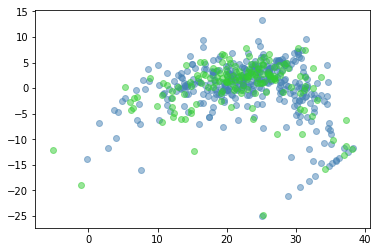

In [48]:
plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',alpha = 0.5,marker='o')
plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',alpha = 0.5,marker='o')

In [50]:
lasr.coef_

array([-0.09231623,  0.03468339, -0.        ,  0.        , -0.        ,
        1.27520851,  0.01146268, -0.61672342,  0.19161526, -0.00953423,
       -0.70378649,  0.0109334 , -0.78052588])